In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

### Frozen orange juice

In [2]:
orange=pd.read_csv("C:\\Users\\Lenovo\\OneDrive\\Desktop\\orange.csv")
orange

,Sample_number,Nonconforming_cans
0,1,12
1,2,15
2,3,8
3,4,10
4,5,4
5,6,7
6,7,16
7,8,9
8,9,14
9,10,10


In [3]:
sample_size=50
orange['Fraction_defectives'] = orange.Nonconforming_cans.apply(lambda x :x/sample_size)
orange

,Sample_number,Nonconforming_cans,Fraction_defectives
0,1,12,0.24
1,2,15,0.30
2,3,8,0.16
3,4,10,0.20
4,5,4,0.08
5,6,7,0.14
6,7,16,0.32
7,8,9,0.18
8,9,14,0.28
9,10,10,0.20


In [4]:
# Function to calculate Central line, UCL, LCL
def calculator():
    # Central line
    p0 = orange.Fraction_defectives.mean()

    # Upper control limit
    UCL = p0 + 3*np.sqrt((p0*(1-p0))/sample_size)

    # Lower control limit
    LCL = p0 - 3*np.sqrt((p0*(1-p0))/sample_size)

    return p0, UCL, LCL

In [5]:
# Function  to Display the value of Central line, Upper lower control limit
def show():
    print('Central limit : {}\nUpper Control limit : {}\nLower Control Limit : {}'.format(p0, UCL, LCL ))

In [6]:
# Get values
  
p0 = calculator()[0]
UCL = calculator()[1]
LCL = calculator()[2]

#Display the value of Central line, Upper lower control limit
show()

Central limit : 0.2306666666666667
Upper Control limit : 0.40939193068941193
Lower Control Limit : 0.05194140264392144


In [7]:
# Function to plot a graph
def show_plot():
    plt.figure(figsize=(20,9))
    plt.title('P chart')
    plt.axhline(y=p0, color='red', linestyle='-')
    plt.axhline(y=UCL, color='blue', linestyle='-')
    plt.axhline(y=LCL, color='blue', linestyle='-')
    plt.plot(orange.index, orange.Fraction_defectives, 'go-')
    plt.xlabel('Sample number')
    plt.ylabel('Fraction of conforming')
    plt.grid()
    plt.show()

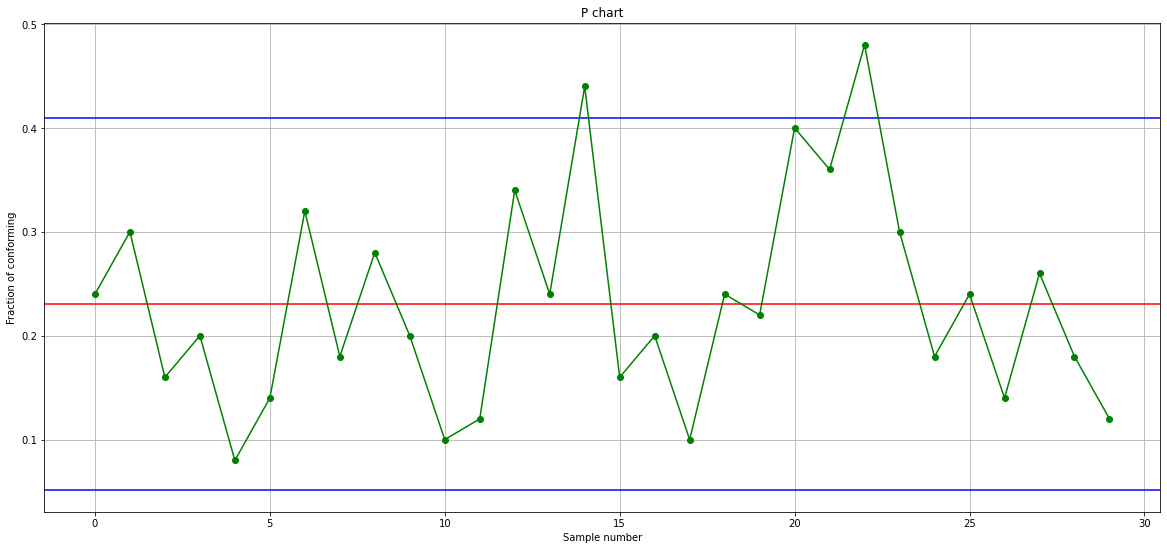

In [8]:
show_plot()

* Interpretation : Two points are out of control, let's move for Phase II Analysis

In [9]:
out = orange[orange['Fraction_defectives'] > UCL]
values = out.Sample_number.values
print('Sample number {} and {} are out of control'.format(int(values[0]), int(values[1])))

Sample number 15 and 23 are out of control


In [10]:
orange.drop(out.index, inplace=True)
orange.reset_index(drop=True)

,Sample_number,Nonconforming_cans,Fraction_defectives
0,1,12,0.24
1,2,15,0.30
2,3,8,0.16
3,4,10,0.20
4,5,4,0.08
5,6,7,0.14
6,7,16,0.32
7,8,9,0.18
8,9,14,0.28
9,10,10,0.20


In [11]:
# Get values

p0 = calculator()[0]
UCL = calculator()[1]
LCL = calculator()[2]

#Display the value of Central line, Upper lower control limit
show()

Central limit : 0.21428571428571427
Upper Control limit : 0.38837225152791344
Lower Control Limit : 0.04019917704351514


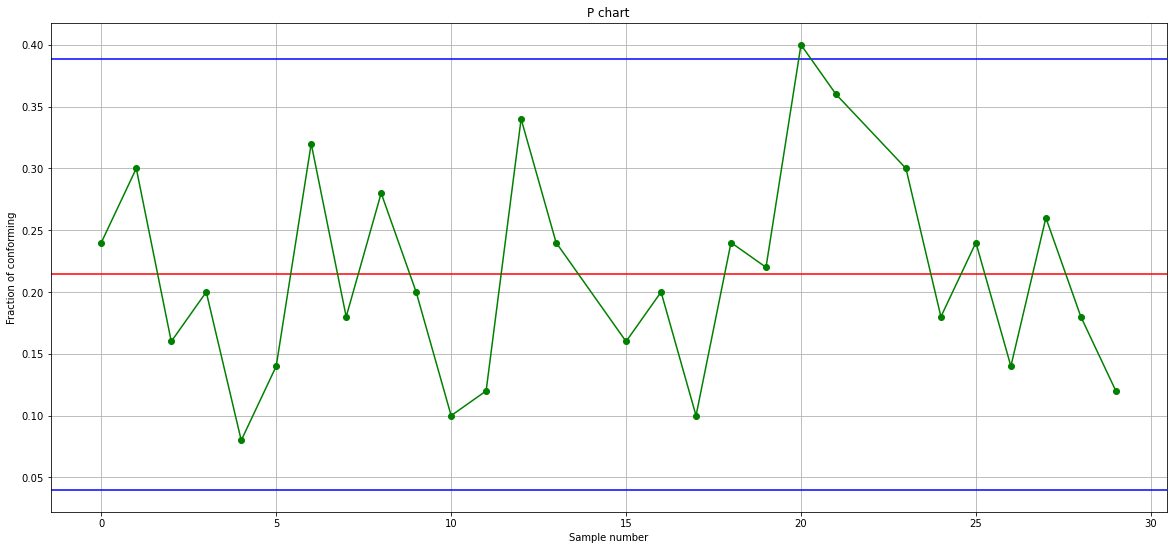

In [12]:
show_plot()

* Interpretation: One point out of control

In [13]:
out = orange[orange['Fraction_defectives'] > UCL]
print('Sample number {} is out of control'.format(int(out.Sample_number.values[0])))

Sample number 21 is out of control


In [14]:
orange.drop(out.index, inplace=True)
orange.reset_index(drop=True)

,Sample_number,Nonconforming_cans,Fraction_defectives
0,1,12,0.24
1,2,15,0.30
2,3,8,0.16
3,4,10,0.20
4,5,4,0.08
5,6,7,0.14
6,7,16,0.32
7,8,9,0.18
8,9,14,0.28
9,10,10,0.20


In [15]:
# Get values

p0 = calculator()[0]
UCL = calculator()[1]
LCL = calculator()[2]

#Display the value of Central line, Upper lower control limit
show()

Central limit : 0.2074074074074074
Upper Control limit : 0.3794252072328619
Lower Control Limit : 0.03538960758195292


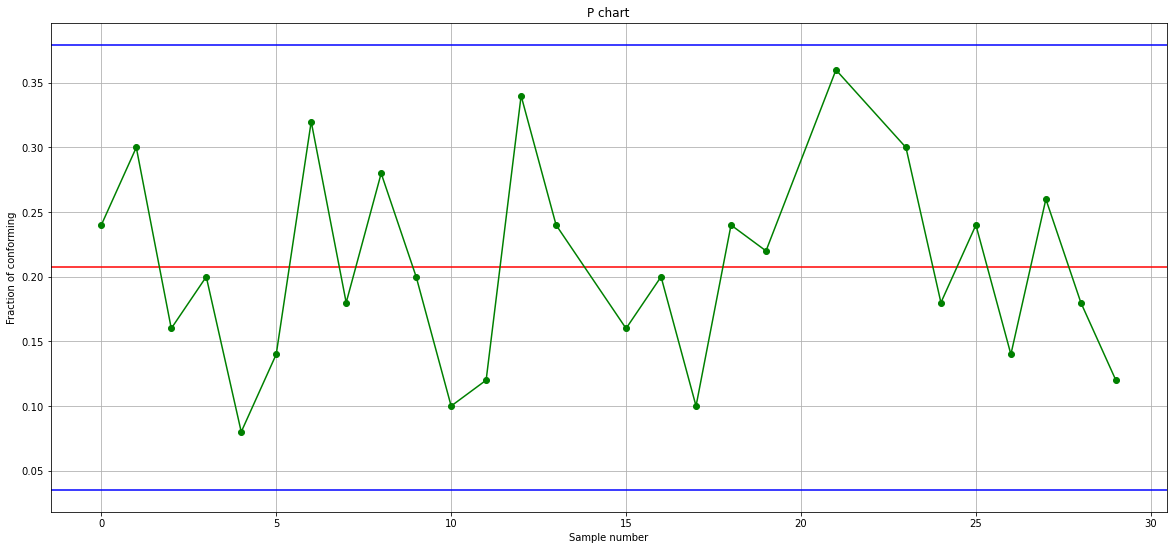

In [16]:
show_plot()

* Interpretation : The process is in control wich totale sample number = 27

### Aerospace 

In [37]:
Aerospace=pd.read_csv("C:\\Users\\Lenovo\\OneDrive\\Desktop\\SQC_lab\\lab3\\Aerospace.csv")
Aerospace 

,sample_number,sample_size,Nonconforming_Di
0,1,100,12
1,2,80,8
2,3,80,6
3,4,100,9
4,5,110,10
5,6,110,12
6,7,100,11
7,8,100,16
8,9,90,10
9,10,90,6


In [38]:
Aerospace['Fraction_defectives'] = Aerospace.Nonconforming_Di/Aerospace.sample_size
Aerospace

,sample_number,sample_size,Nonconforming_Di,Fraction_defectives
0,1,100,12,0.120000
1,2,80,8,0.100000
2,3,80,6,0.075000
3,4,100,9,0.090000
4,5,110,10,0.090909
5,6,110,12,0.109091
6,7,100,11,0.110000
7,8,100,16,0.160000
8,9,90,10,0.111111
9,10,90,6,0.066667


In [39]:
# Function to calculate Central line, UCL, LCL
def calculator():
    # Central line
    p0 = Aerospace.Fraction_defectives.mean()

    # Upper control limit
    UCL =[p0 + 3*np.sqrt((p0*(1-p0))/Aerospace.iloc[i,1]) for i in Aerospace.index]
    Aerospace['ucl']=pd.DataFrame(UCL)
    
    # Lower control limit
    LCL =[max(0,p0 - 3*np.sqrt((p0*(1-p0))/Aerospace.iloc[i,1])) for i in Aerospace.index]
    Aerospace['lcl']=pd.DataFrame(LCL)
              
    return p0, Aerospace

In [40]:
# Get Values
p0 = calculator()[0]
data = calculator()[1]
Aerospace

,sample_number,sample_size,Nonconforming_Di,Fraction_defectives,ucl,lcl
0,1,100,12,0.120000,0.183277,0.007165
1,2,80,8,0.100000,0.193671,0.000000
2,3,80,6,0.075000,0.193671,0.000000
3,4,100,9,0.090000,0.183277,0.007165
4,5,110,10,0.090909,0.179179,0.011263
5,6,110,12,0.109091,0.179179,0.011263
6,7,100,11,0.110000,0.183277,0.007165
7,8,100,16,0.160000,0.183277,0.007165
8,9,90,10,0.111111,0.188040,0.002402
9,10,90,6,0.066667,0.188040,0.002402


In [41]:
def show_plot():
    plt.figure(figsize=(20,9))
    plt.title('P chart')
    plt.axhline(y=p0, color='green', linestyle='-')
    #plt.axhline(y=ucl, color='red', linestyle='-')
    #plt.axhline(y=lcl, color='red', linestyle='-')
    plt.plot(Aerospace.index, Aerospace.Fraction_defectives, 'bo-')
    plt.plot(Aerospace.index, Aerospace.ucl, 'ro-') 
    plt.plot(Aerospace.index, Aerospace.lcl, 'ro-')
    plt.xlabel('Sample number')
    plt.ylabel('Fraction of conforming')
    plt.grid()
    plt.show()

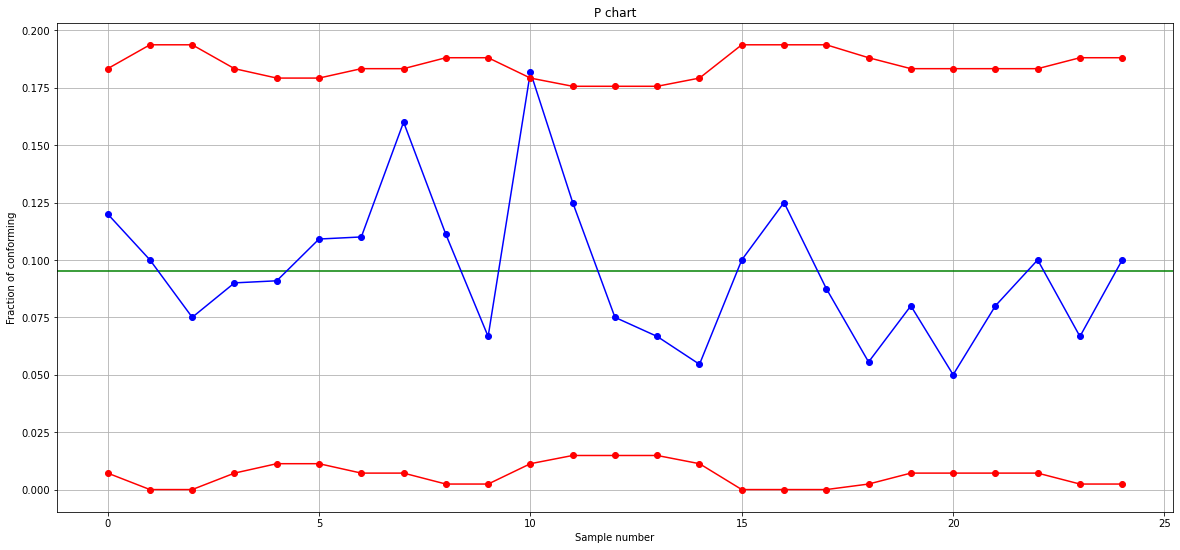

In [42]:
show_plot()

* Interpretation : One point is out of control
* phase II Analysis 

In [43]:
out = Aerospace[(Aerospace.Fraction_defectives > Aerospace.ucl)]
print('Sample number {} is out of control'.format(int(out.sample_number.values[0])))

Sample number 11 is out of control


In [44]:
Aerospace.drop(out.index, inplace=True)
Aerospace.reset_index(drop=True, inplace=True)

In [45]:
Aerospace

,sample_number,sample_size,Nonconforming_Di,Fraction_defectives,ucl,lcl
0,1,100,12,0.120000,0.183277,0.007165
1,2,80,8,0.100000,0.193671,0.000000
2,3,80,6,0.075000,0.193671,0.000000
3,4,100,9,0.090000,0.183277,0.007165
4,5,110,10,0.090909,0.179179,0.011263
5,6,110,12,0.109091,0.179179,0.011263
6,7,100,11,0.110000,0.183277,0.007165
7,8,100,16,0.160000,0.183277,0.007165
8,9,90,10,0.111111,0.188040,0.002402
9,10,90,6,0.066667,0.188040,0.002402


In [46]:
# Get Values
p0 = calculator()[0]
data = calculator()[1]


In [47]:
Aerospace

,sample_number,sample_size,Nonconforming_Di,Fraction_defectives,ucl,lcl
0,1,100,12,0.120000,0.178157,0.005069
1,2,80,8,0.100000,0.188372,0.000000
2,3,80,6,0.075000,0.188372,0.000000
3,4,100,9,0.090000,0.178157,0.005069
4,5,110,10,0.090909,0.174129,0.009097
5,6,110,12,0.109091,0.174129,0.009097
6,7,100,11,0.110000,0.178157,0.005069
7,8,100,16,0.160000,0.178157,0.005069
8,9,90,10,0.111111,0.182838,0.000388
9,10,90,6,0.066667,0.182838,0.000388


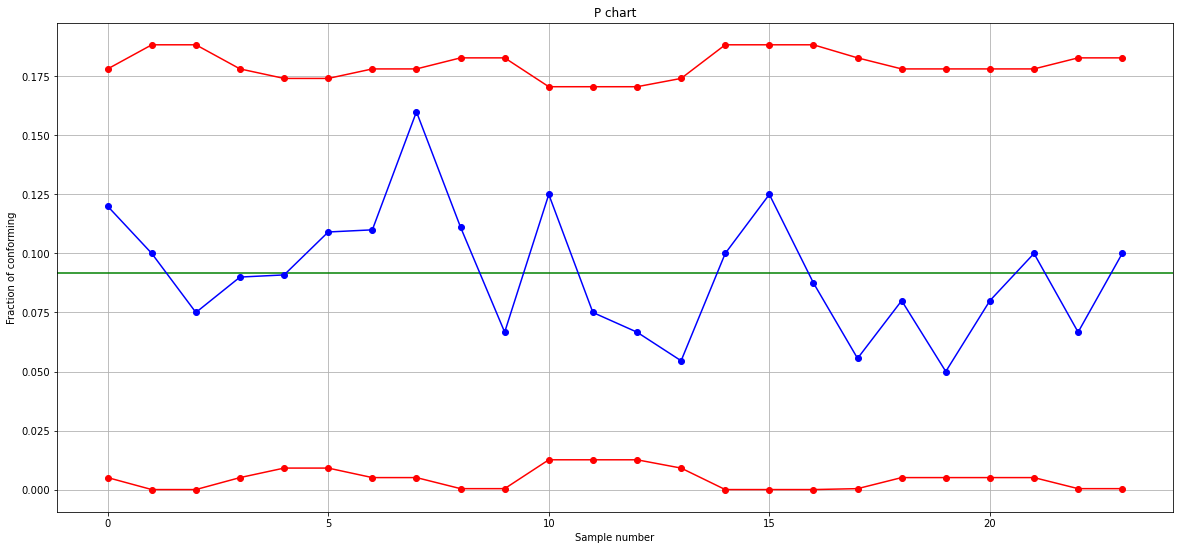

In [48]:
show_plot()

* Interpretation : The process is in control